In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [135]:
df = pd.read_csv('diabetes.csv')

In [136]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


- Pregnancies = Number of times pregnant
- Glucose = Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure = Diastolic blood pressure (mm Hg)
- SkinThickness = Triceps skin fold thickness (mm)
- Insulin = 2-Hour serum insulin (mu U/ml)
- BMI = Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction = Diabetes pedigree function
- Age = Age (years)
- Outcome = Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [137]:
df.shape

(768, 9)

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [139]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## Cleaning

In [140]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Since features like Insulin, BMI, BloodPressure, Glucose and SkinThickness cannot have minimum value of 0, we need to do something about that.

In [141]:
print(df.Age.unique())

[50 31 32 21 33 30 26 29 53 54 34 57 59 51 27 41 43 22 38 60 28 45 35 46
 56 37 48 40 25 24 58 42 44 39 36 23 61 69 62 55 65 47 52 66 49 63 67 72
 81 64 70 68]


In [142]:
# make age_category column which will help in filling values which are 0
df['age_category'] = pd.cut(df['Age'], bins=[0, 21, 31, 41, 51, 61, 71, 81, np.inf], labels=[1,2,3,4,5,6,7,8])
df['age_category'] = df['age_category'].astype(int)

In [143]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_category
0,6,148,72,35,0,33.6,0.627,50,1,4
1,1,85,66,29,0,26.6,0.351,31,0,2
2,8,183,64,0,0,23.3,0.672,32,1,3
3,1,89,66,23,94,28.1,0.167,21,0,1
4,0,137,40,35,168,43.1,2.288,33,1,3


In [144]:
# Fill insulin column with respect to age category
agecat = [1,2,3,4,5,6,7,8]

for agec in agecat:
    df['Insulin'].replace(0, round(df[df['age_category'] == agec]['Insulin'].mean(), 0), inplace=True)

In [145]:
df['Insulin'].describe()

count    768.000000
mean     115.835938
std       94.298227
min       14.000000
25%       74.000000
50%       74.000000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

In [146]:
df['Insulin'].dtype

dtype('int64')

In [147]:
# Fill rest with same strategy
features = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']
for feature in features:
    for agec in agecat:
        if df[feature].dtype == 'float64':
            df[feature].replace(0, round(df[df['age_category'] == agec][feature].mean(), 1), inplace=True)
        else:
            df[feature].replace(0, round(df[df['age_category'] == agec][feature].mean(), 0), inplace=True)

In [148]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_category
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.597656,72.113281,26.152344,115.835938,32.390755,0.471876,33.240885,0.348958,2.697917
std,3.369578,30.455873,12.169980,9.938479,94.298227,6.897416,0.331329,11.760232,0.476951,1.192062
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000,1.000000
25%,1.000000,99.750000,64.000000,19.000000,74.000000,27.500000,0.243750,24.000000,0.000000,2.000000
50%,3.000000,117.000000,72.000000,23.000000,74.000000,32.000000,0.372500,29.000000,0.000000,2.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000,3.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,7.000000


### Outliers

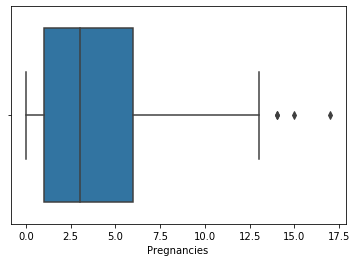

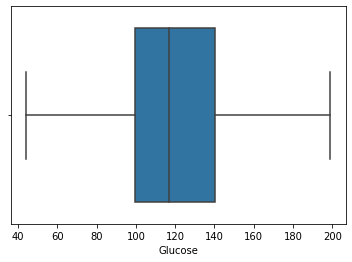

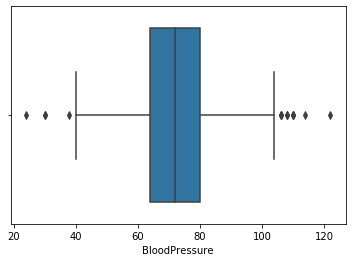

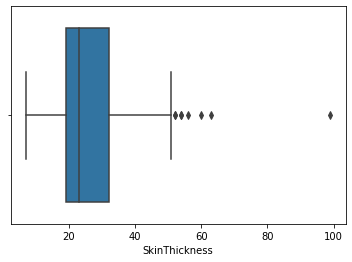

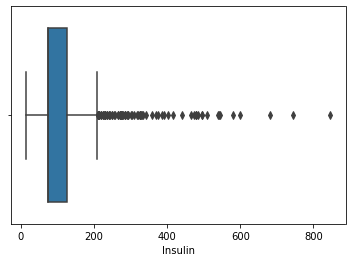

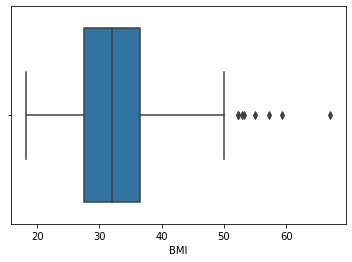

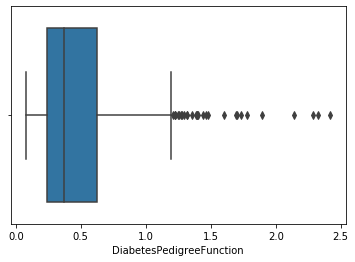

In [149]:
# use box plot for features till DiabetesPedigreeFunction
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']

for feature in features:
    sns.boxplot(x=feature, data=df)
    plt.show()

In [150]:
df['Insulin'].mean()

115.8359375

In [151]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)

[[0.63994726 0.86746978 0.00931432 ... 1.4259954  1.36589591 1.0930065 ]
 [0.84488505 1.2024448  0.50265205 ... 0.19067191 0.73212021 0.58585148]
 [1.23388019 2.01742233 0.66709796 ... 0.10558415 1.36589591 0.25357751]
 ...
 [0.3429808  0.01963647 0.00931432 ... 0.27575966 0.73212021 0.58585148]
 [0.84488505 0.14464247 0.99598978 ... 1.17073215 1.36589591 1.0930065 ]
 [0.84488505 0.9395985  0.17376023 ... 0.87137393 0.73212021 0.58585148]]


In [152]:
threshold = 3
print(np.where(z > 3))

(array([  4,   8,  13,  18,  43,  45,  57,  58,  88, 106, 111, 120, 120,
       123, 125, 125, 153, 159, 177, 177, 186, 220, 228, 228, 247, 248,
       286, 298, 330, 370, 370, 371, 392, 395, 409, 415, 445, 445, 445,
       453, 453, 455, 459, 459, 486, 549, 579, 584, 593, 597, 621, 645,
       655, 666, 673, 684, 691, 695, 753], dtype=int64), array([6, 4, 4, 2, 2, 6, 3, 6, 0, 2, 4, 3, 5, 7, 2, 5, 4, 0, 2, 5, 4, 4,
       4, 6, 4, 4, 4, 0, 6, 4, 6, 6, 4, 6, 4, 4, 3, 5, 6, 7, 9, 0, 7, 9,
       4, 2, 3, 4, 6, 2, 6, 4, 4, 7, 5, 7, 2, 4, 4], dtype=int64))


In [153]:
print(z[4][6])

5.484909100466951


In [154]:
df = df[(z < 3).all(axis=1)]

In [155]:
df.shape

(718, 10)

In [156]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_category
count,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000
mean,3.834262,119.947075,71.990251,25.637883,104.662953,32.076323,0.449453,32.920613,0.337047,2.665738
std,3.275640,29.679083,11.413182,9.280222,63.336634,6.496202,0.282918,11.317435,0.473031,1.147295
min,0.000000,44.000000,38.000000,7.000000,15.000000,18.200000,0.078000,21.000000,0.000000,1.000000
25%,1.000000,99.000000,64.000000,19.000000,74.000000,27.400000,0.241500,24.000000,0.000000,2.000000
50%,3.000000,115.000000,72.000000,22.000000,74.000000,32.000000,0.363000,29.000000,0.000000,2.000000
75%,6.000000,138.000000,80.000000,32.000000,120.000000,36.100000,0.600000,40.000000,1.000000,3.000000
max,13.000000,199.000000,108.000000,54.000000,392.000000,52.900000,1.461000,68.000000,1.000000,6.000000


### With IQR

In [157]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Pregnancies                  5.0000
Glucose                     39.0000
BloodPressure               16.0000
SkinThickness               13.0000
Insulin                     46.0000
BMI                          8.7000
DiabetesPedigreeFunction     0.3585
Age                         16.0000
Outcome                      1.0000
age_category                 1.0000
dtype: float64


In [158]:
print(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0          False    False          False          False    False  False   
1          False    False          False          False    False  False   
2          False    False          False          False    False  False   
3          False    False          False          False    False  False   
5          False    False          False          False    False  False   
6          False    False          False          False    False  False   
7          False    False          False          False    False  False   
9          False    False          False          False    False  False   
10         False    False          False          False    False  False   
11         False    False          False          False    False  False   
12         False    False          False          False    False  False   
14         False    False          False          False    False  False   
15         False    False

TypeError: cannot compare a dtyped [bool] array with a scalar of type [NoneType]

In [159]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(554, 10)

In [160]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_category
count,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000
mean,3.601083,114.940433,70.815884,24.835740,86.494585,31.546209,0.404964,30.166065,0.292419,2.386282
std,3.152208,27.290846,10.813328,8.665791,32.635321,6.209230,0.231664,8.300496,0.455285,0.836915
min,0.000000,44.000000,44.000000,8.000000,15.000000,18.200000,0.078000,21.000000,0.000000,1.000000
25%,1.000000,96.000000,64.000000,19.000000,74.000000,27.300000,0.236000,23.000000,0.000000,2.000000
50%,3.000000,111.000000,70.000000,20.500000,74.000000,31.200000,0.336500,28.000000,0.000000,2.000000
75%,6.000000,129.000000,78.000000,31.000000,92.000000,35.400000,0.546500,37.000000,1.000000,3.000000
max,13.000000,196.000000,104.000000,50.000000,188.000000,48.300000,1.136000,51.000000,1.000000,4.000000


### Now, we are ready for some ML!

In [162]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_category
0,6,148,72,35,74,33.6,0.627,50,1,4
1,1,85,66,29,74,26.6,0.351,31,0,2
2,8,183,64,19,74,23.3,0.672,32,1,3
3,1,89,66,23,94,28.1,0.167,21,0,1
5,5,116,74,19,74,25.6,0.201,30,0,2


In [163]:
from sklearn.model_selection import train_test_split

X = df.drop(['Outcome'], axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Logistic Regression

In [164]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\devan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [165]:
y_pred = lr.predict(X_test)

In [166]:
y_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int64)

In [167]:
# Check confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score

print("Confusion matrix: ")
print( confusion_matrix(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))

Confusion matrix: 
[[76  3]
 [19 13]]
Accuracy:  0.8018018018018018


### Random Forest Classifier

In [168]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

C:\Users\devan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [169]:
y_pred = rfc.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int64)

In [170]:
# Check confusion matrix and accuracy score

print("Confusion matrix: ")
print( confusion_matrix(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))

Confusion matrix: 
[[74  5]
 [15 17]]
Accuracy:  0.8198198198198198


### XGBoost Classifier

In [171]:
import xgboost

xgbc = xgboost.XGBClassifier()
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [172]:
y_pred = xgbc.predict(X_test)
y_pred

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0], dtype=int64)

In [173]:
# Check confusion matrix and accuracy score

print("Confusion matrix: ")
print( confusion_matrix(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))

Confusion matrix: 
[[73  6]
 [15 17]]
Accuracy:  0.8108108108108109
